In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
mushroom=pd.read_csv('mushroom.csv',na_values='?')

In [4]:
mushroom

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [5]:
mushroom.shape

(8124, 23)

In [6]:
mushroom.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [7]:
mushroom.isnull().sum()

class                          0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64

In [8]:
from sklearn.impute import SimpleImputer

In [9]:
si=SimpleImputer(strategy='most_frequent')

In [10]:
mushroom['stalk-root']=si.fit_transform(mushroom['stalk-root'].values.reshape(-1,1))

In [11]:
mushroom.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
#PREPROCESSING

In [14]:
le=LabelEncoder()
for a in mushroom.columns:
    mushroom[a]=le.fit_transform(mushroom[a].astype(str))

In [15]:
mushroom

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


In [16]:
mushroom.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [17]:
#splitting the data in x and y.
x=mushroom.drop('class',axis=1)
x

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,0,11,0,...,2,5,5,0,1,1,4,0,1,2
8120,5,2,4,0,5,0,0,0,11,0,...,2,5,5,0,0,1,4,0,4,2
8121,2,2,4,0,5,0,0,0,5,0,...,2,5,5,0,1,1,4,0,1,2
8122,3,3,4,0,8,1,0,1,0,1,...,1,7,7,0,2,1,0,7,4,2


In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scale=StandardScaler()

In [20]:
x=scale.fit_transform(x)

In [21]:
x

array([[ 1.02971224,  0.14012794, -0.19824983, ..., -0.67019486,
        -0.5143892 ,  2.03002809],
       [ 1.02971224,  0.14012794,  1.76587407, ..., -0.2504706 ,
        -1.31310821, -0.29572966],
       [-2.08704716,  0.14012794,  1.37304929, ..., -0.2504706 ,
        -1.31310821,  0.86714922],
       ...,
       [-0.8403434 ,  0.14012794, -0.19824983, ..., -1.50964337,
        -2.11182722,  0.28570978],
       [-0.21699152,  0.95327039, -0.19824983, ...,  1.42842641,
         0.28432981,  0.28570978],
       [ 1.02971224,  0.14012794, -0.19824983, ...,  0.16925365,
        -2.11182722,  0.28570978]])

In [22]:
x=pd.DataFrame(data=x)
x

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,1.029712,0.140128,-0.198250,1.185917,0.881938,0.162896,-0.438864,1.494683,-0.228998,-1.144806,...,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.670195,-0.514389,2.030028
1,1.029712,0.140128,1.765874,1.185917,-1.970316,0.162896,-0.438864,-0.669038,-0.228998,-1.144806,...,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.250471,-1.313108,-0.295730
2,-2.087047,0.140128,1.373049,1.185917,-0.544189,0.162896,-0.438864,-0.669038,0.053477,-1.144806,...,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.250471,-1.313108,0.867149
3,1.029712,0.953270,1.373049,1.185917,0.881938,0.162896,-0.438864,1.494683,0.053477,-1.144806,...,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.670195,-0.514389,2.030028
4,1.029712,0.140128,-0.591075,-0.843230,0.406562,0.162896,2.278612,-0.669038,-0.228998,0.873511,...,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,-1.272216,-0.250471,-2.910546,-0.295730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,-0.216992,0.140128,-0.198250,-0.843230,0.406562,-6.138869,-0.438864,-0.669038,1.748325,-1.144806,...,0.586385,-0.429288,-0.416681,0.0,-3.979055,-0.256132,0.948081,-1.509643,-2.111827,0.285710
8120,1.029712,0.140128,-0.198250,-0.843230,0.406562,-6.138869,-0.438864,-0.669038,1.748325,-1.144806,...,0.586385,-0.429288,-0.416681,0.0,-8.100146,-0.256132,0.948081,-1.509643,0.284330,0.285710
8121,-0.840343,0.140128,-0.198250,-0.843230,0.406562,-6.138869,-0.438864,-0.669038,0.053477,-1.144806,...,0.586385,-0.429288,-0.416681,0.0,-3.979055,-0.256132,0.948081,-1.509643,-2.111827,0.285710
8122,-0.216992,0.953270,-0.198250,-0.843230,1.832689,0.162896,-0.438864,1.494683,-1.358896,0.873511,...,-0.893053,0.622441,0.631991,0.0,0.142037,-0.256132,-1.272216,1.428426,0.284330,0.285710


In [23]:
y=mushroom['class']

In [24]:
y

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int32

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score 

In [26]:
list=[LogisticRegression(),GaussianNB(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier()]
for j in list:
    r_max=0
    print('for the algorithm:',j)
    for i in range(33,101):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=.30)
        j.fit(x_train,y_train)
        pred=j.predict(x_test)
        accuracy=accuracy_score(pred,y_test)
        print('accuracy score corresponding to random state',i,'is:',accuracy)
        if accuracy>r_max:
            r_max=accuracy
            final=i
    
    print('\n')
    print('Max accuracy score corresponding to:', final, 'is: ',r_max)
    print('\n')

for the algorithm: LogisticRegression()
accuracy score corresponding to random state 33 is: 0.9643150123051681
accuracy score corresponding to random state 34 is: 0.9667760459392944
accuracy score corresponding to random state 35 is: 0.9675963904840033
accuracy score corresponding to random state 36 is: 0.9634946677604594
accuracy score corresponding to random state 37 is: 0.9626743232157506
accuracy score corresponding to random state 38 is: 0.9647251845775225
accuracy score corresponding to random state 39 is: 0.9643150123051681
accuracy score corresponding to random state 40 is: 0.9639048400328137
accuracy score corresponding to random state 41 is: 0.9639048400328137
accuracy score corresponding to random state 42 is: 0.963084495488105
accuracy score corresponding to random state 43 is: 0.9622641509433962
accuracy score corresponding to random state 44 is: 0.9692370795734209
accuracy score corresponding to random state 45 is: 0.9585726004922067
accuracy score corresponding to random

1. LogisticRegression  accuracy score of 0.9745 at random state 54.
2. GaussianNB accuracy score of 0.9175 at random state 61.
3. SVC gave us accuracy score of 1.0 at random state 33.
4. Decision Tree Classifier  accuracy score of 1.0 at random state 33.
5. K Neighbors classifier accuracy score of 1.0 at random state 33.
6. Random Forest clasifier accuracy score of 1.0 at random state 33.

In [27]:
from sklearn.model_selection import cross_val_score
list=[LogisticRegression(),GaussianNB(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier()]
for i in list:
    cvscore=cross_val_score(i,x,y,cv=9)
    print('The cross validation score for', i, 'is: ',cvscore)
    print('The mean and standard Deviations are: ', cvscore.mean(),cvscore.std())
    print('\n')

The cross validation score for LogisticRegression() is:  [0.70874862 0.90808416 0.99224806 0.98006645 0.91251384 0.97674419
 1.         0.66962306 0.97006652]
The mean and standard Deviations are:  0.9020105438142875 0.1181127162527727


The cross validation score for GaussianNB() is:  [0.66998893 0.82834994 0.98671096 0.95238095 0.78848283 0.7641196
 0.72838137 0.83924612 0.97228381]
The mean and standard Deviations are:  0.836660503421706 0.10617744616947654


The cross validation score for SVC() is:  [0.71650055 1.         1.         1.         1.         1.
 1.         0.82039911 0.98337029]
The mean and standard Deviations are:  0.9466966616711372 0.0985076133822877


The cross validation score for DecisionTreeClassifier() is:  [0.71650055 1.         1.         1.         1.         1.
 1.         0.76053215 1.        ]
The mean and standard Deviations are:  0.9418925227206566 0.1092034170287707


The cross validation score for KNeighborsClassifier() is:  [0.71650055 1.         1.

In Cross validation score method, KNeighborsClassifier performed well with accuracy score of 0.9494070980174213.

In [28]:
#working on the best model-KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=33)
knn.fit(x_train,y_train)
print(knn.score(x_train,y_train))
pred=knn.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,pred))
print("Confusion matrix:",confusion_matrix(y_test,pred))
print('Classification report:',classification_report(y_test,pred))

1.0
Accuracy score: 1.0
Confusion matrix: [[831   0]
 [  0 794]]
Classification report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00       831
           1       1.00      1.00      1.00       794

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [29]:
from sklearn.metrics import roc_curve,roc_auc_score

In [32]:
y_pred_prob=knn.predict_proba(x_test)[:,-1]
y_pred_prob

array([0., 0., 0., ..., 0., 1., 0.])

In [33]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [34]:
fpr

array([0.        , 0.        , 0.00120337, 1.        ])

In [35]:
tpr

array([0., 1., 1., 1.])

In [36]:
thresholds

array([2. , 1. , 0.2, 0. ])

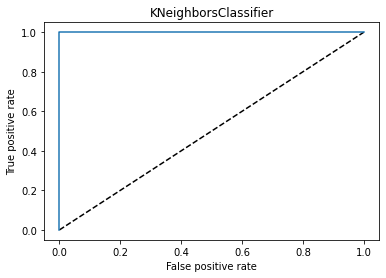

In [37]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='KNeighborsClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('KNeighborsClassifier')
plt.show()

In [38]:
import joblib
joblib.dump(knn,'mushroom_knn.obj')
knn_load=joblib.load('mushroom_knn.obj')
knn_load.predict(x_test)

array([0, 0, 0, ..., 0, 1, 0])

In [39]:
y_test

851     0
408     0
4061    0
2381    0
1523    0
       ..
605     0
4877    1
5223    0
1930    1
415     0
Name: class, Length: 1625, dtype: int32